In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [ ]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH, Omega_t_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR, Omega_t_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

**Udregner performance**

In [ ]:
res_ARCH, perf_table_ARCH = cs.performance_table(v_t_ARCH, out_of_sample_s_ARCH,Omega_t_ARCH,portfolio_value=1e9)
res_GARCH, perf_table_GARCH = cs.performance_table(v_t_GARCH, out_of_sample_s_GARCH,Omega_t_GARCH,portfolio_value=1e9)
res_GJR, perf_table_GJR = cs.performance_table(v_t_GJR, out_of_sample_s_GJR,Omega_t_GJR,portfolio_value=1e9)

**Sammensætter til en tabel**

In [ ]:
#No trading cost first
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[2,])
perf_table=perf_table.append(perf_table_GJR.iloc[1,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table=perf_table.append(perf_table_ARCH.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table=perf_table.append(perf_table_GARCH.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[3,])
perf_table=perf_table.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[4,])
perf_table=perf_table.append(perf_table_GJR.iloc[5,])
perf_table=perf_table.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table.to_latex())


**Laver en tabel af afkast**

In [ ]:
res=res_ARCH.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH"]
res["Equal weight"]=res_GJR["Equal_weight"]
res["Buy and hold"]=res_GJR["BnH"]

res_TC=res_ARCH.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC["GARCH(1,1)"]=res_GARCH["GARCH TC"]
res_TC["GJR-GARCH(1,1)"]=res_GJR["GARCH TC"]
res_TC["Equal weight"]=res_GJR["Equal_weight TC"]
res_TC["Buy and hold"]=res_GJR["BnH TC"]

**Laver figurer**

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before.png", bbox_inches = 'tight', pad_inches = 0.1)


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC,label=res_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

**Lets consider a subset of the ticker, Stocks**

In [ ]:
v_t_ARCH_s, out_of_sample_s_ARCH_s, in_sample_s_ARCH_s, Omega_t_ARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH_s, out_of_sample_s_GARCH_s, in_sample_s_GARCH_s,Omega_t_GARCH_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR_s, out_of_sample_s_GJR_s, in_sample_s_GJR_s, Omega_t_GJR_s = db.garch_no_trading_cost(stocks, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

In [ ]:
res_ARCH_s, perf_table_ARCH_s = cs.performance_table(v_t_ARCH_s, out_of_sample_s_ARCH_s,Omega_t_ARCH_s,portfolio_value=1e9)
res_GARCH_s, perf_table_GARCH_s = cs.performance_table(v_t_GARCH_s, out_of_sample_s_GARCH_s,Omega_t_GARCH_s,portfolio_value=1e9)
res_GJR_s, perf_table_GJR_s = cs.performance_table(v_t_GJR_s, out_of_sample_s_GJR_s,Omega_t_GJR_s,portfolio_value=1e9)

In [ ]:
#No trading cost first
perf_table_s=perf_table_ARCH_s.iloc[0:1,]
perf_table_s=perf_table_s.rename(index={'GARCH':'ARCH(1)'})
perf_table_s=perf_table_s.append(perf_table_GARCH.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[0,])
perf_table_s=perf_table_s.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[2,])
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[1,])
perf_table_s=perf_table_s.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table_s=perf_table_s.append(perf_table_ARCH.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table_s=perf_table_s.append(perf_table_GARCH.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[3,])
perf_table_s=perf_table_s.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[4,])
perf_table_s=perf_table_s.append(perf_table_GJR.iloc[5,])
perf_table_s=perf_table_s.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table_s.to_latex())

In [ ]:
res_s=res_ARCH_s.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res_s["GARCH(1,1)"]=res_GARCH_s["GARCH"]
res_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH"]
res_s["Equal weight"]=res_GJR_s["Equal_weight"]
res_s["Buy and hold"]=res_GJR_s["BnH"]

res_TC_s=res_ARCH_s.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_TC_s["GARCH(1,1)"]=res_GARCH_s["GARCH TC"]
res_TC_s["GJR-GARCH(1,1)"]=res_GJR_s["GARCH TC"]
res_TC_s["Equal weight"]=res_GJR_s["Equal_weight TC"]
res_TC_s["Buy and hold"]=res_GJR_s["BnH TC"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_s,label=res_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_TC_s,label=res_TC_s.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_TC_s.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Net Return',loc='top', rotation = 0, labelpad = -75) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("Performance_no_TC_after_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("ARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("GARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_s,linewidth=1)
ax.set_ylim(-1.5,2.6)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("Backtesting\output\GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)
fig.savefig("GJRGARCH_weight_NO_TC_S.png", bbox_inches = 'tight', pad_inches = 0.1)

**Transaction costs**

In [99]:
v_t_ARCH_TC, out_of_sample_ARCH_TC, _,Omega_t_ARCH_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="sGARCH10",tuning_gamma_D=50)
v_t_GARCH_TC, out_of_sample_GARCH_TC, _,Omega_t_GARCH_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="sGARCH11",tuning_gamma_D=50)
v_t_GJR_TC, out_of_sample_GJR_TC, _,Omega_t_GJR_TC = db.garch_with_trading_cost(tickers=tickers,
number_of_out_of_sample_days=4*250, model_type="gjrGARCH11",tuning_gamma_D=50)

['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
[*********************100%***********************]  11 of 11 completed
Solving problem with trading costs. gamma_D = 1.526988705495546e-06
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
[*********************100%***********************]  11 of 11 completed
Solving problem with trading costs. gamma_D = 1.526988705495546e-06
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
[*********************100%***********************]  11 of 11 completed
Solving problem with trading costs. gamma_D = 1.526988705495546e-06


In [100]:
res_ARCH_TC, perf_table_ARCH_TC = cs.performance_table(v_t_ARCH_TC, out_of_sample_ARCH_TC,Omega_t_ARCH_TC,portfolio_value=1e9)
res_GARCH_TC, perf_table_GARCH_TC = cs.performance_table(v_t_GARCH_TC, out_of_sample_GARCH_TC,Omega_t_GARCH_TC,portfolio_value=1e9)
res_GJR_TC, perf_table_GJR_TC = cs.performance_table(v_t_GJR_TC, out_of_sample_GJR_TC,Omega_t_GJR_TC,portfolio_value=1e9)

In [101]:
#No trading cost first
perf_table_TC=perf_table_ARCH_TC.iloc[0:1,]
perf_table_TC=perf_table_TC.rename(index={'GARCH':'ARCH(1)'})
perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[0,])
perf_table_TC=perf_table_TC.rename(index={'GARCH':'GARCH(1,1)'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[0,])
perf_table_TC=perf_table_TC.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[2,])
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[1,])
perf_table_TC=perf_table_TC.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table_TC=perf_table_TC.append(perf_table_ARCH_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GARCH_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[3,])
perf_table_TC=perf_table_TC.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[4,])
perf_table_TC=perf_table_TC.append(perf_table_GJR_TC.iloc[5,])
perf_table_TC=perf_table_TC.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table_TC.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                 0.072064 &     0.076255 &           1.058154 \\
GARCH(1,1)        &                 0.084145 &     0.097698 &           1.161066 \\
GJR-GARCH(1,1)    &                 0.083755 &     0.100775 &           1.203221 \\
Buy and hold      &                 0.082924 &     0.099347 &           1.198047 \\
Equal weight      &                 0.156527 &     0.110537 &           0.706189 \\
ARCH(1) TC        &                 0.072605 &     0.068690 &           0.946079 \\
GARCH(1,1) TC     &                 0.100434 &     0.013370 &           0.133123 \\
GJR-GARCH(1,1) TC &                 0.093014 &     0.032719 &           0.351770 \\
Equal weight TC   &                 0.159053 &     0.060175 &           0.378332 \\
Buy and hold TC   &                 0.082924 &     0.099347 &           1.198047 \\
\bottomrule
\end{tabular}



In [102]:
res_tc=res_ARCH_TC.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res_tc["GARCH(1,1)"]=res_GARCH_TC["GARCH"]
res_tc["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH"]
res_tc["Equal weight"]=res_GJR_TC["Equal_weight"]
res_tc["Buy and hold"]=res_GJR_TC["BnH"]

res_tc_TC=res_ARCH_TC.drop(columns=['GARCH','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH TC':'ARCH(1)'})
res_tc_TC["GARCH(1,1)"]=res_GARCH_TC["GARCH TC"]
res_tc_TC["GJR-GARCH(1,1)"]=res_GJR_TC["GARCH TC"]
res_tc_TC["Equal weight"]=res_GJR_TC["Equal_weight TC"]
res_tc_TC["Buy and hold"]=res_GJR_TC["BnH TC"]

Text(0, 1, 'Gross Return')

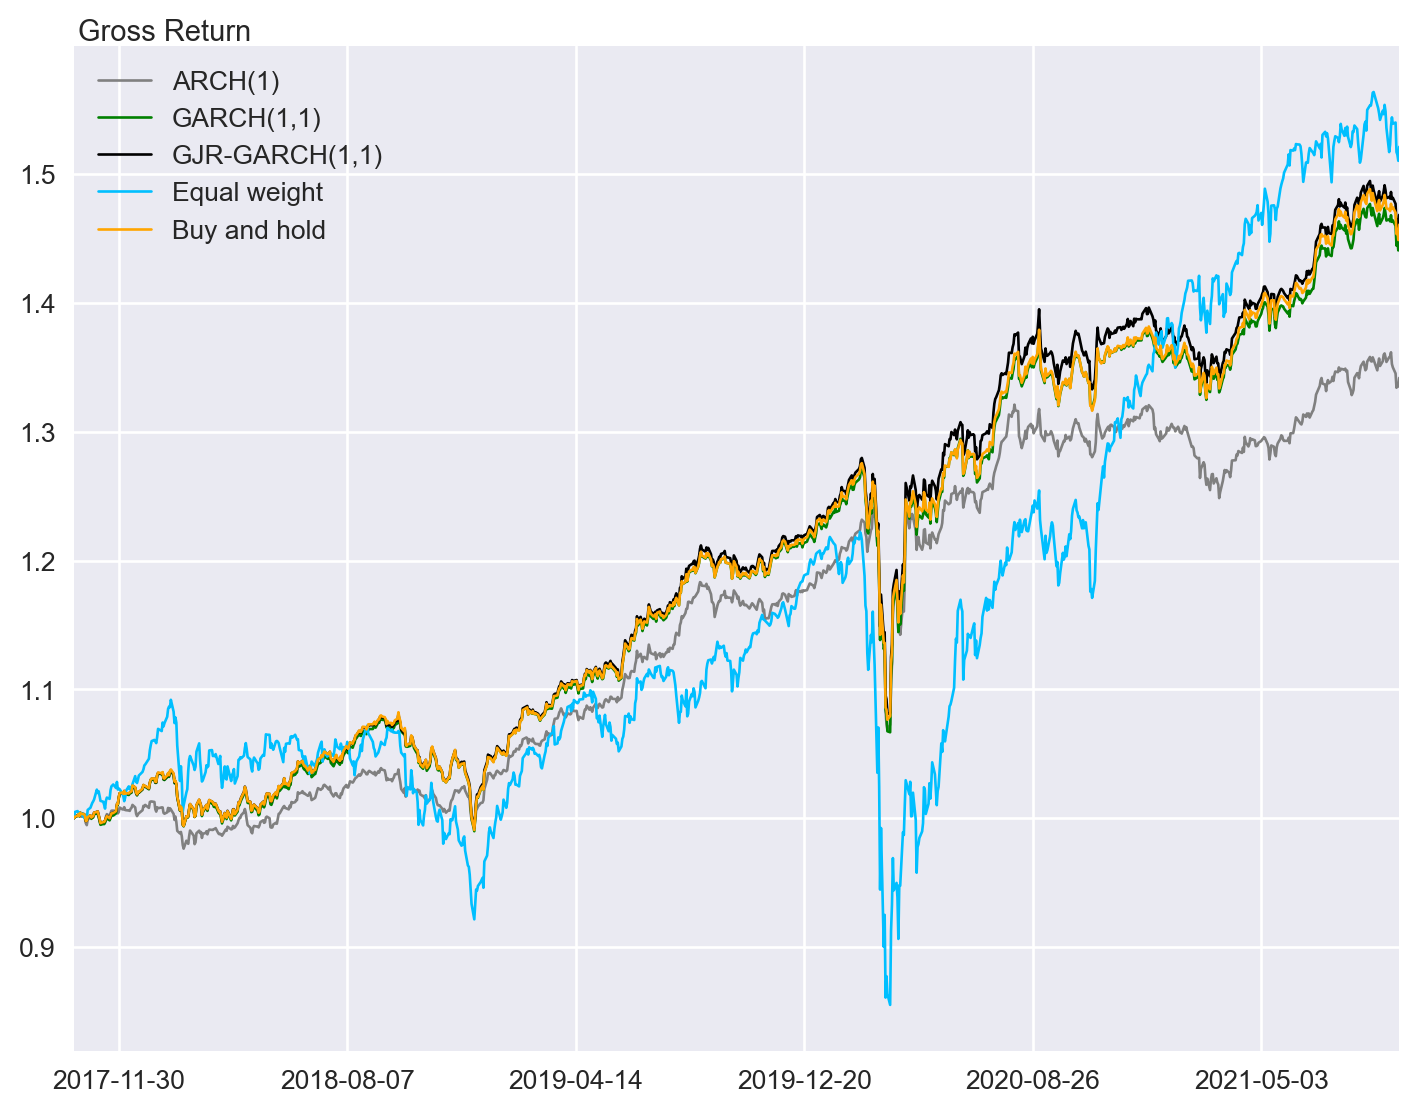

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_tc,label=res_GARCH_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_tc.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

Text(0, 1, 'Gross Return')

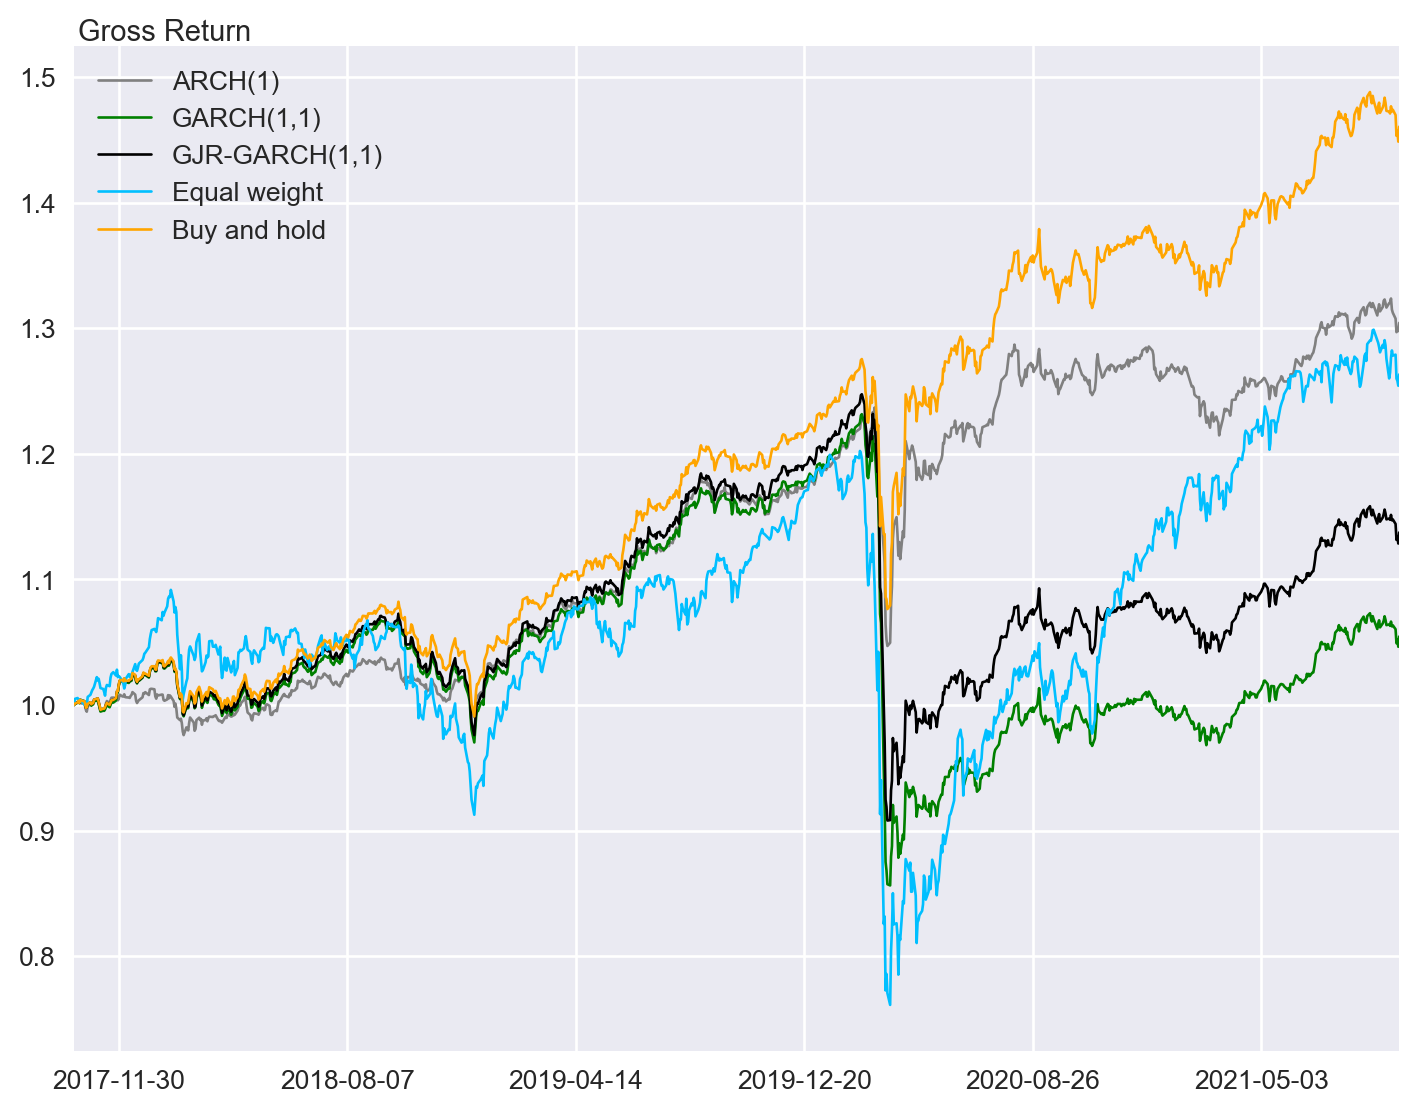

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res_tc_TC,label=res_GARCH_TC.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res_tc_TC.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
#fig.savefig("Backtesting\output\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)
#fig.savefig("Performance_no_TC_before_S.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH_TC,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("ARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH_TC,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("GARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR_TC,linewidth=1)
ax.margins(0,0.05)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
#fig.savefig("GJRGARCH_weight_TC.png", bbox_inches = 'tight', pad_inches = 0.1)